# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data Set

In [8]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\projects\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Displaying first 5 rows of dataset

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking shape of the dataset

In [10]:
df.shape

(7043, 21)

### Checking Columns

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking information about columns (missingvalues,dtypes,total columns etc)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data cleaning

### Cleaning Colunm_Names for easy usage

In [13]:
col_names = [ col.strip().lower().replace(' ','_').replace('-','_') for col in df.columns]

df.columns = col_names

df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [14]:
'''Dropping customerID column because including it in the model would not contribute to predicting customer churn'''
df.drop(columns = ['customerid'], axis=1, inplace = True)

df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Correcting Data Types of the columns

In [15]:
'''seniorcitizen columns is saved as int64 chnaged it to object type as it has discrete values'''

df['seniorcitizen'] = df['seniorcitizen'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [17]:
df['totalcharges'] = df['totalcharges'].replace(' ','')

In [18]:
df['totalcharges'] = df['totalcharges'].str.strip()

In [19]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   object 
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [21]:
df.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [22]:
df.dropna(subset = ['totalcharges'], inplace = True)
df.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [23]:
df.shape

(7032, 20)

## Let's Analyse the data generating insights 

## Step1: Analysis of Numerical Columns

In [24]:
numerical_cols = df.select_dtypes(include = ['int64','float64'])

numerical_cols.columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

#### UNIVARIATE NON-VIZ FOR NUMERICAL COLUMNS

In [25]:
def numerical_univariate_analysis(numerical_columns):
    for col_name in numerical_columns:
        print("*"*12, col_name, "*"*12)
        print(numerical_columns[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [26]:
numerical_univariate_analysis(numerical_cols)

************ tenure ************
count     7032.000000
min          1.000000
max         72.000000
mean        32.421786
median      29.000000
std         24.545260
skew         0.237731
kurt        -1.387823
Name: tenure, dtype: float64

************ monthlycharges ************
count     7032.000000
min         18.250000
max        118.750000
mean        64.798208
median      70.350000
std         30.085974
skew        -0.222103
kurt        -1.256156
Name: monthlycharges, dtype: float64

************ totalcharges ************
count     7032.000000
min         18.800000
max       8684.800000
mean      2283.300441
median    1397.475000
std       2266.771362
skew         0.961642
kurt        -0.231799
Name: totalcharges, dtype: float64



#### BIVARIATE NON-VIZ FOR NUMERICAL COLUMN

In [27]:
correlation = numerical_cols.corr()
correlation

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.246862,0.825880
monthlycharges,0.246862,1.000000,0.651065
totalcharges,0.825880,0.651065,1.000000


In [28]:
correlation = numerical_cols.corr()
correlation

,tenure,monthlycharges,totalcharges
tenure,1.000000,0.246862,0.825880
monthlycharges,0.246862,1.000000,0.651065
totalcharges,0.825880,0.651065,1.000000


#### BIVARIATE VIZ FOR NUMERICAL COLUMN

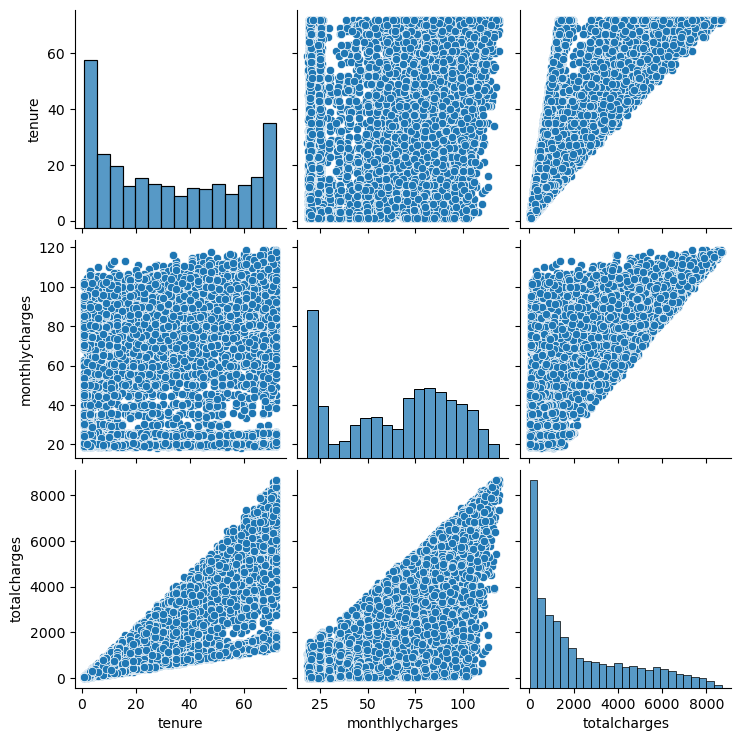

In [29]:
sns.pairplot(numerical_cols)

<Axes: >

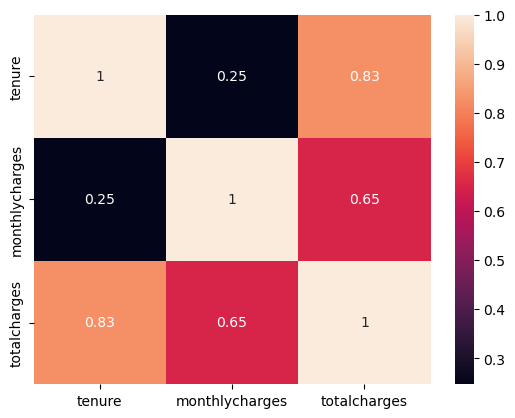

In [30]:
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix,annot = True)

## Step2: Analysis of Categorical Columns

In [31]:
object_cols = df.select_dtypes(include = ['object'])

object_cols.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [32]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts(normalize = True)*100)
        print()

discrete_univariate_analysis(object_cols)

********** gender **********
count                7032
nunique                 2
unique     [Female, Male]
Name: gender, dtype: object
Value Counts: 
 Male      50.469283
Female    49.530717
Name: gender, dtype: float64

********** seniorcitizen **********
count        7032
nunique         2
unique     [0, 1]
Name: seniorcitizen, dtype: object
Value Counts: 
 0    83.759954
1    16.240046
Name: seniorcitizen, dtype: float64

********** partner **********
count           7032
nunique            2
unique     [Yes, No]
Name: partner, dtype: object
Value Counts: 
 No     51.749147
Yes    48.250853
Name: partner, dtype: float64

********** dependents **********
count           7032
nunique            2
unique     [No, Yes]
Name: dependents, dtype: object
Value Counts: 
 No     70.150739
Yes    29.849261
Name: dependents, dtype: float64

********** phoneservice **********
count           7032
nunique            2
unique     [No, Yes]
Name: phoneservice, dtype: object
Value Counts: 
 Yes    9

#### UNIVARIATE VIZ FOR CATEGORICAL COLUMNS

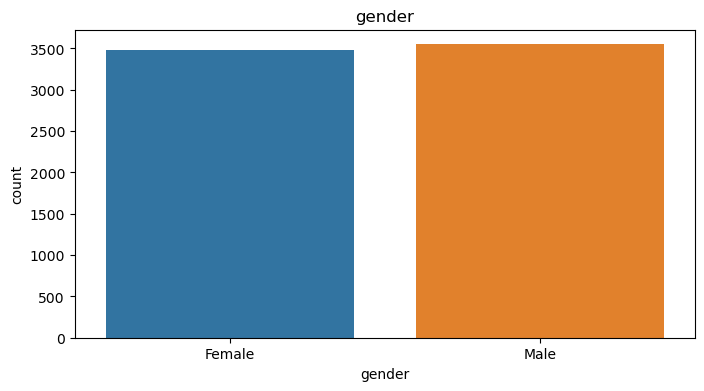

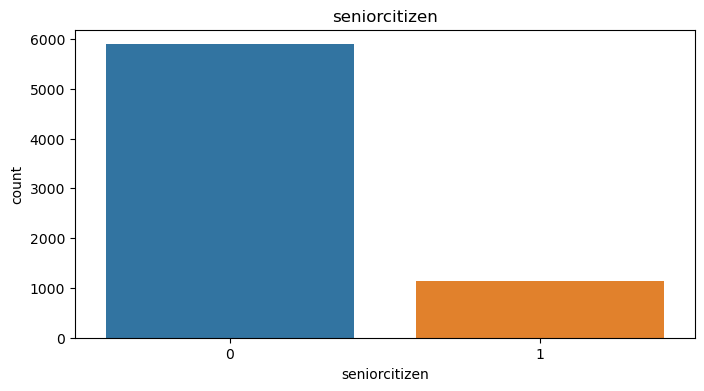

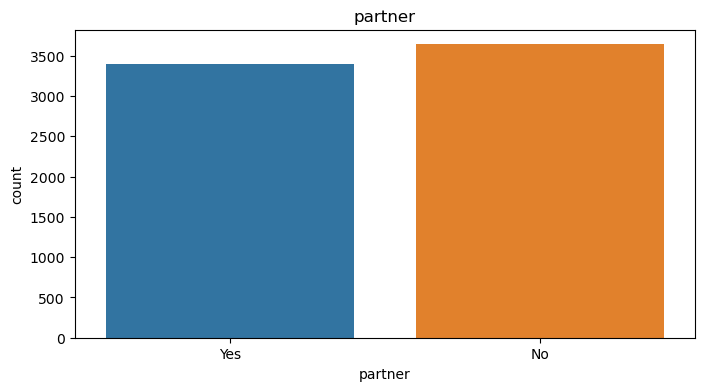

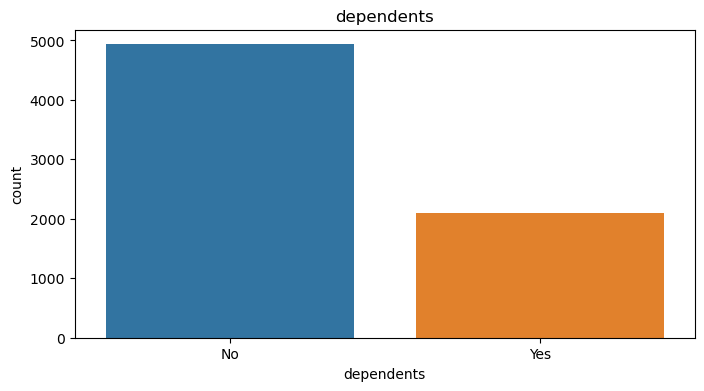

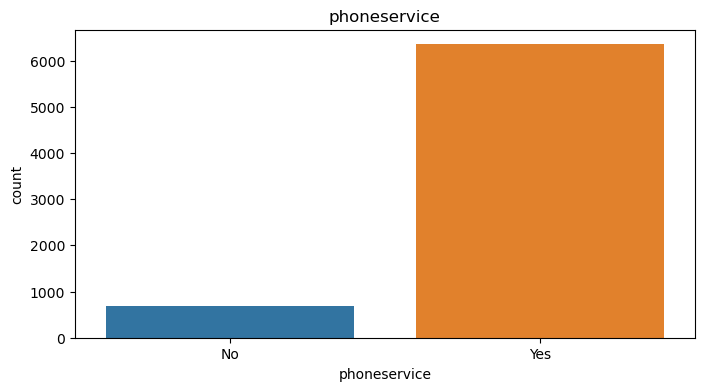

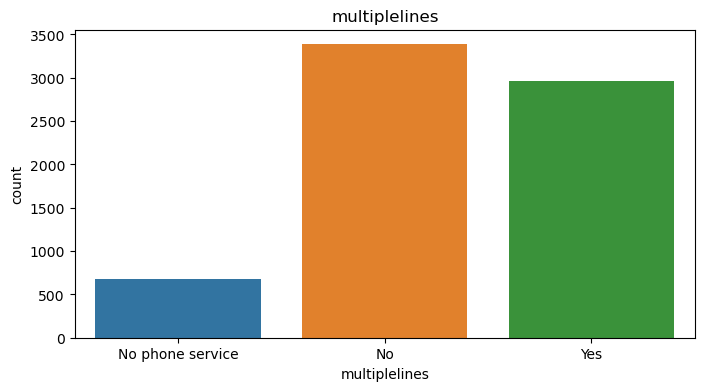

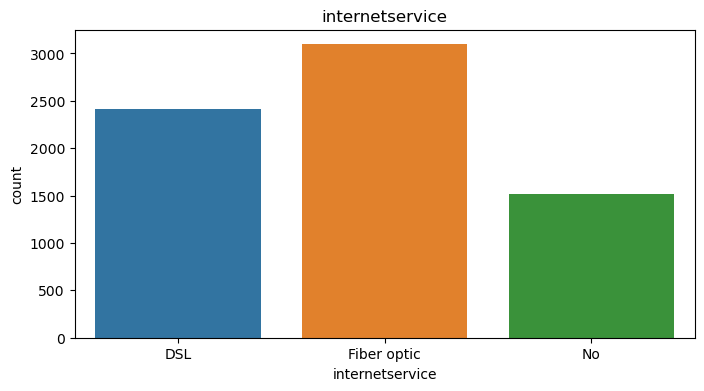

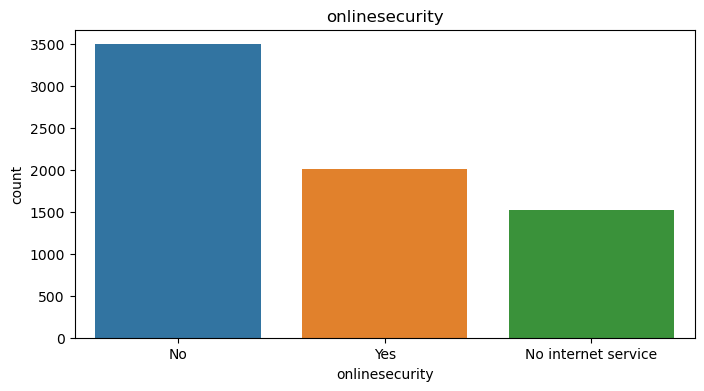

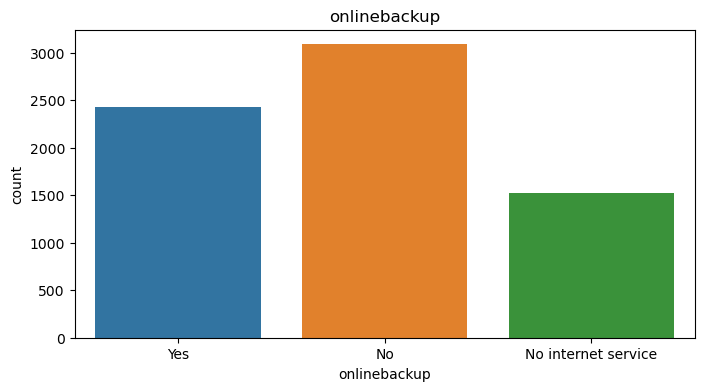

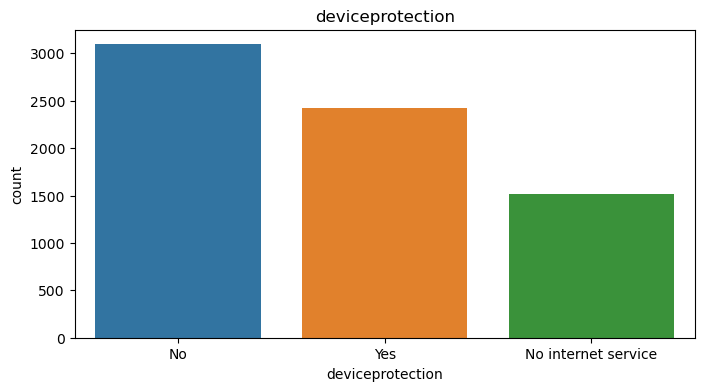

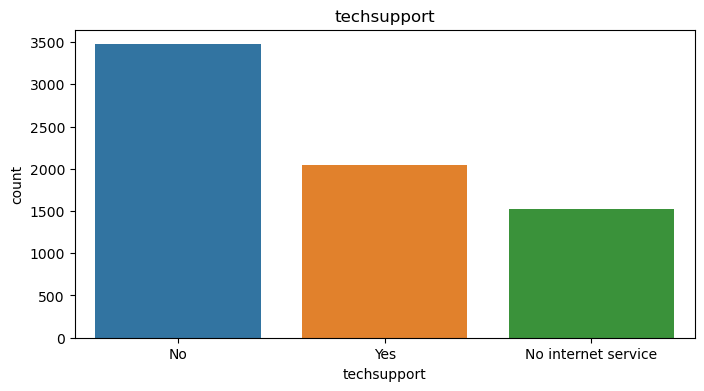

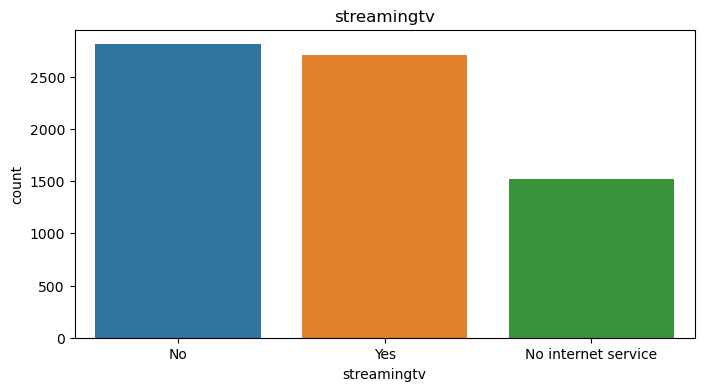

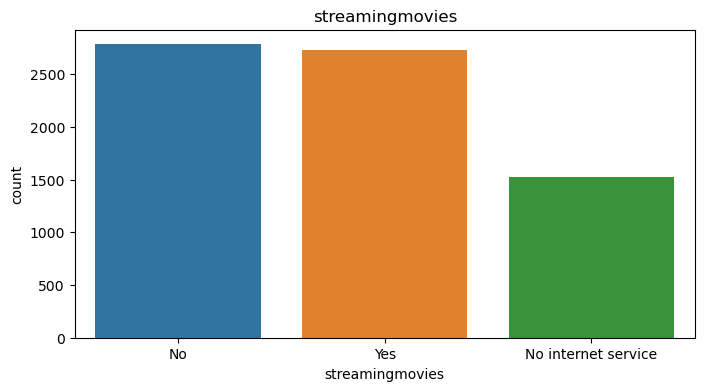

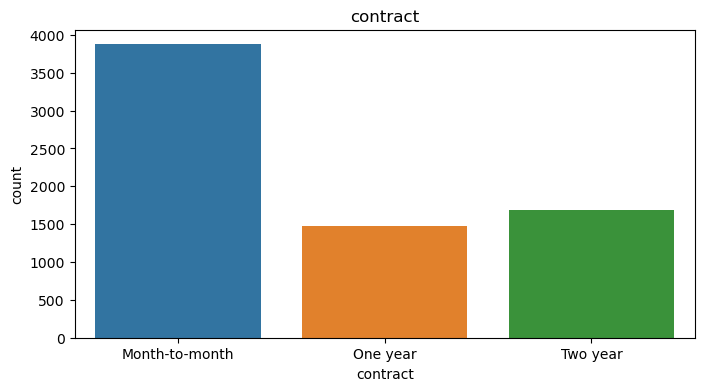

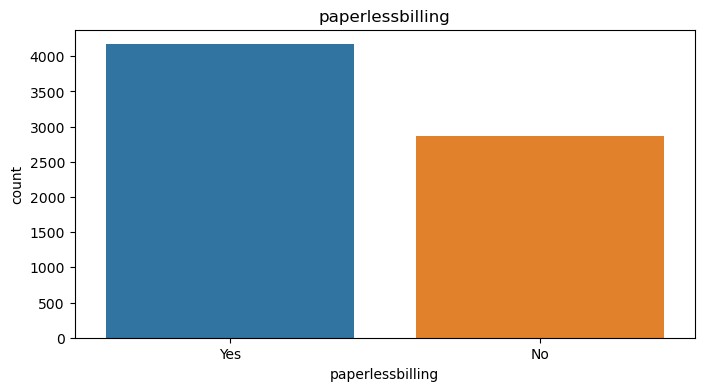

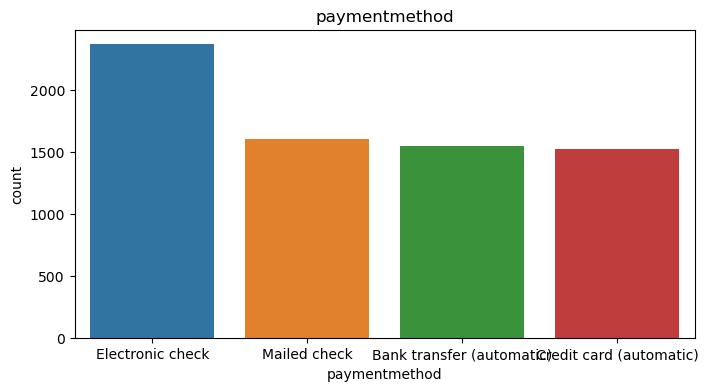

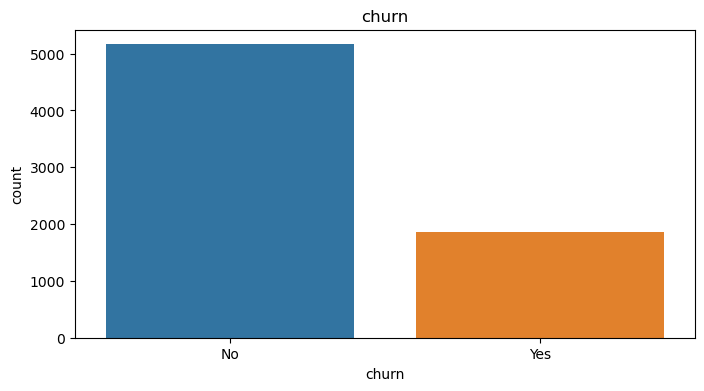

In [33]:
for col in object_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'{col}')

#### BIVARIATE NON-VIZ FOR CATEGORICAL COLUMN

In [34]:
for col in object_cols:
    var = df.groupby('churn')
    print(var[col].value_counts())

churn  gender
No     Male      2619
       Female    2544
Yes    Female     939
       Male       930
Name: gender, dtype: int64
churn  seniorcitizen
No     0                4497
       1                 666
Yes    0                1393
       1                 476
Name: seniorcitizen, dtype: int64
churn  partner
No     Yes        2724
       No         2439
Yes    No         1200
       Yes         669
Name: partner, dtype: int64
churn  dependents
No     No            3390
       Yes           1773
Yes    No            1543
       Yes            326
Name: dependents, dtype: int64
churn  phoneservice
No     Yes             4653
       No               510
Yes    Yes             1699
       No               170
Name: phoneservice, dtype: int64
churn  multiplelines   
No     No                  2536
       Yes                 2117
       No phone service     510
Yes    Yes                  850
       No                   849
       No phone service     170
Name: multiplelines, dtype: int

#### BIVARIATE VIZ FOR CATEGORICAL COLUMN

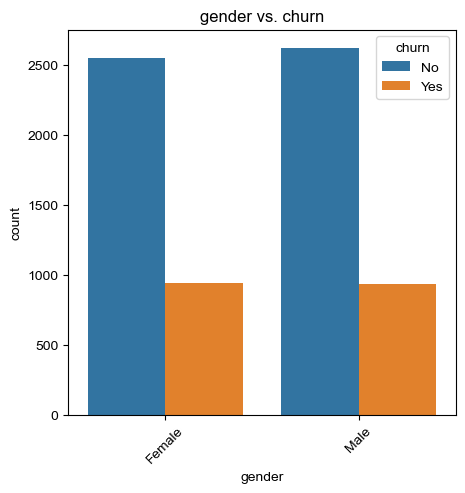

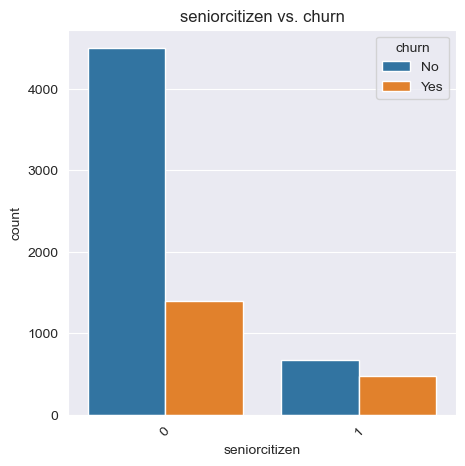

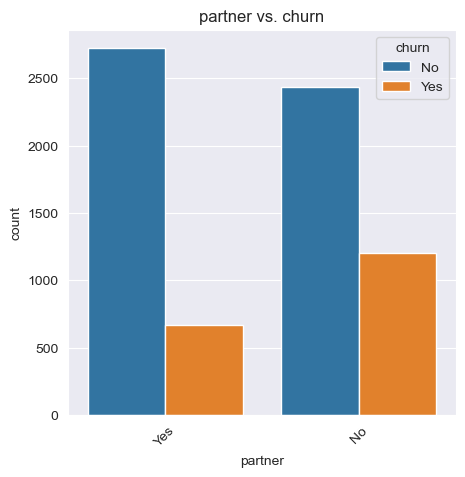

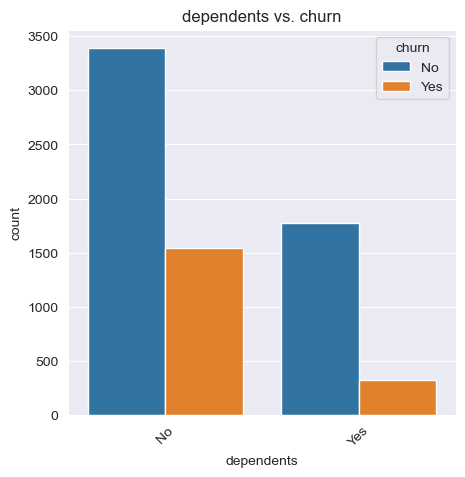

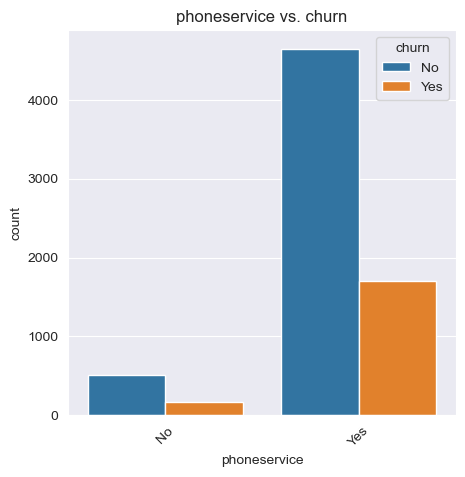

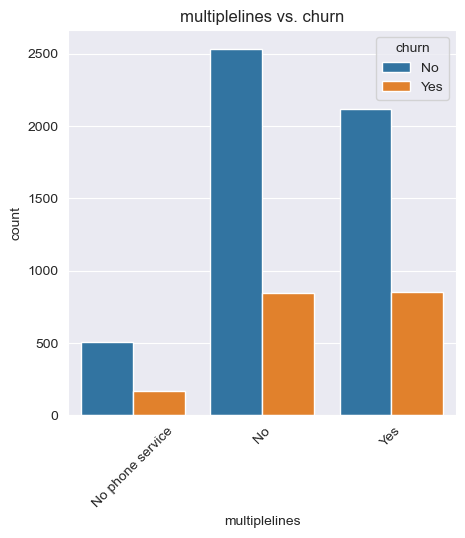

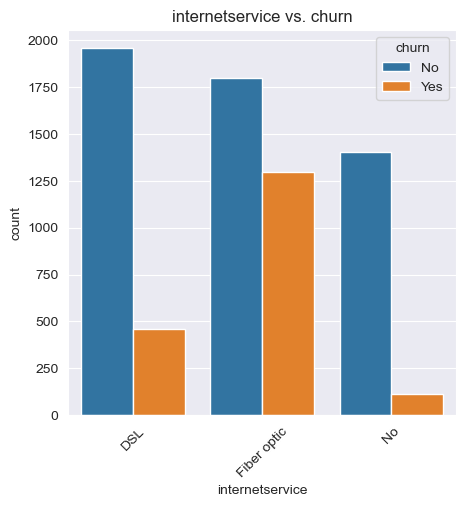

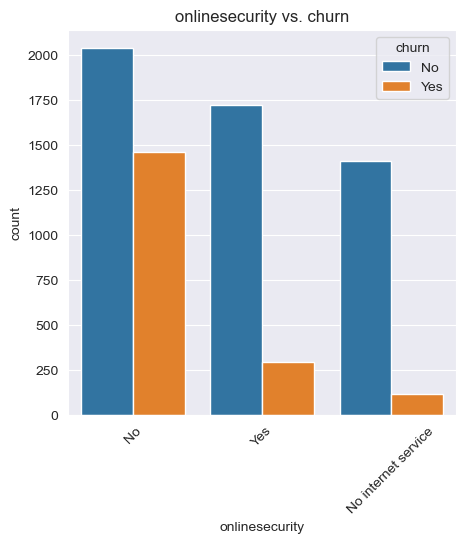

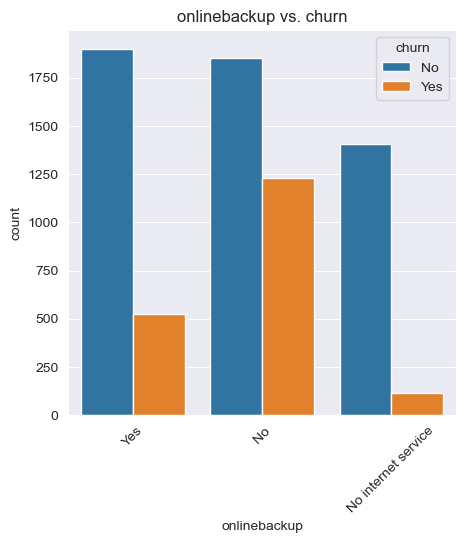

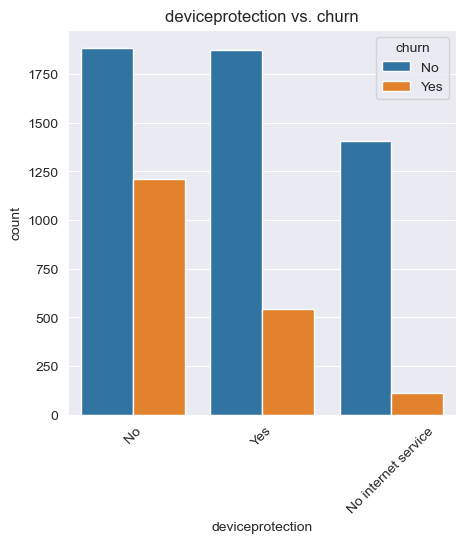

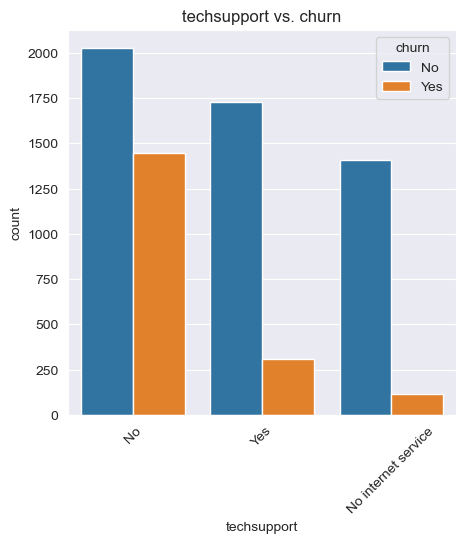

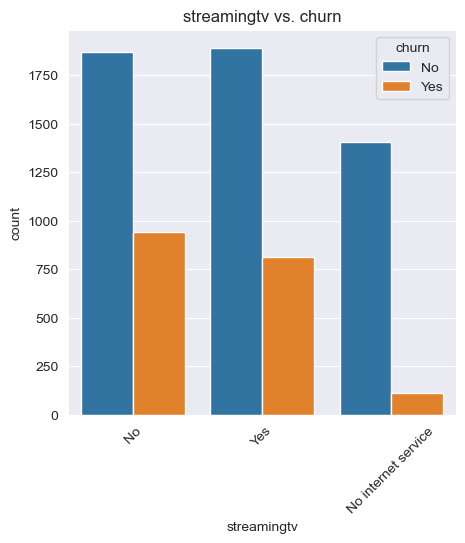

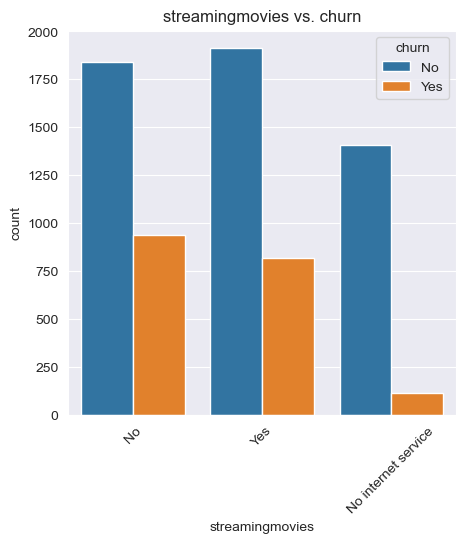

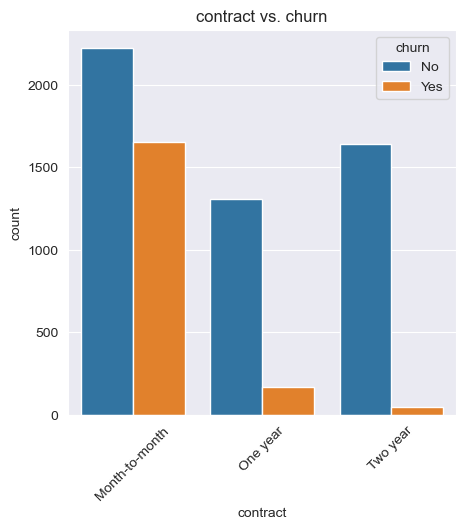

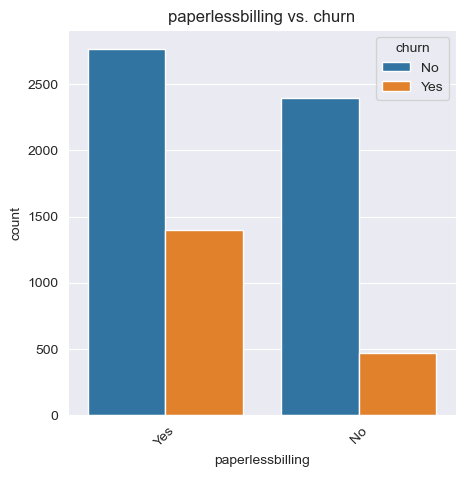

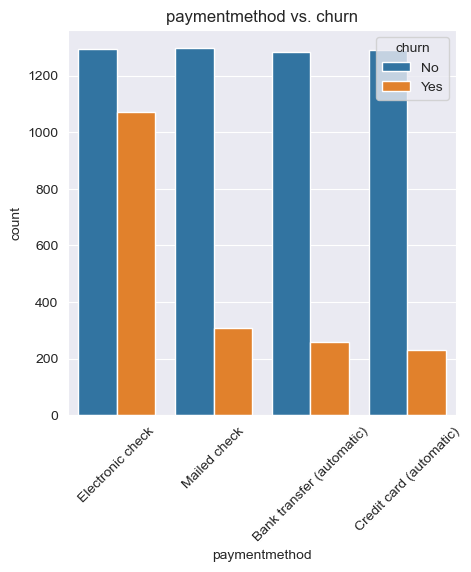

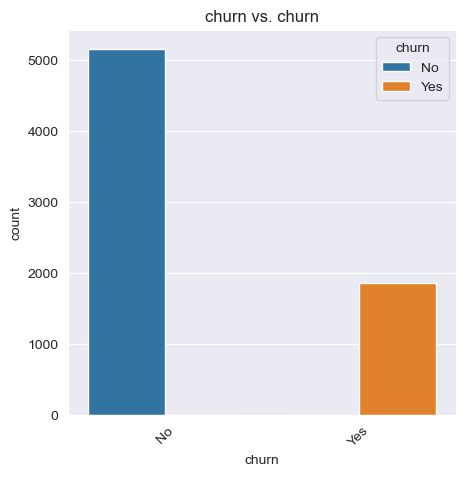

In [35]:
for col in object_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, hue='churn', data=df, saturation=0.75)
    sns.set_style("darkgrid")
    plt.xticks(rotation=45)
    plt.title(f'{col} vs. churn')

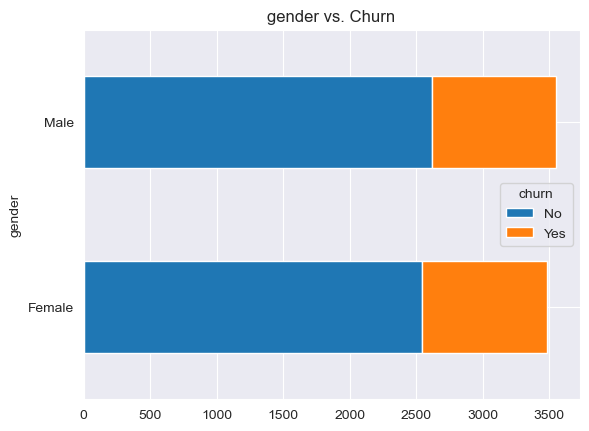

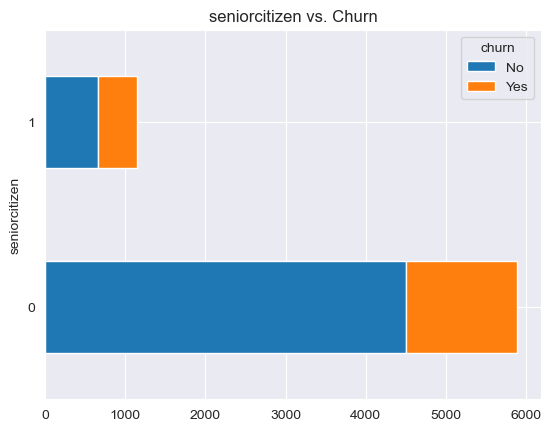

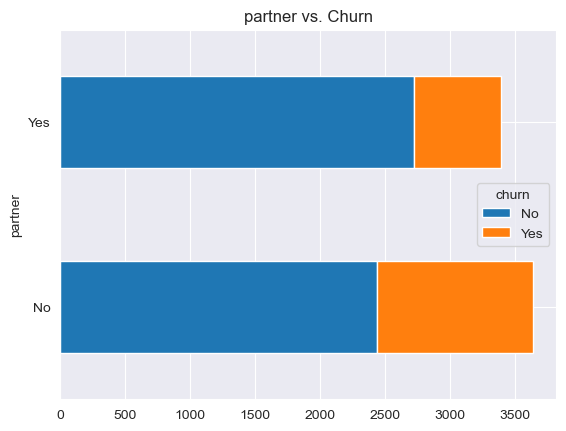

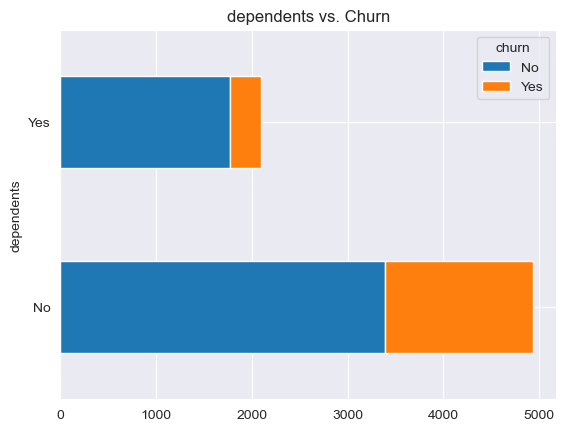

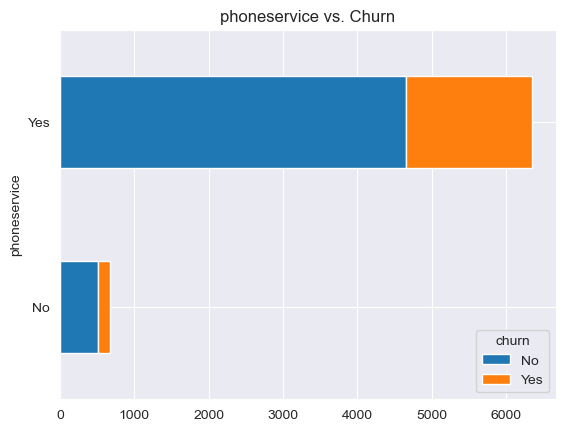

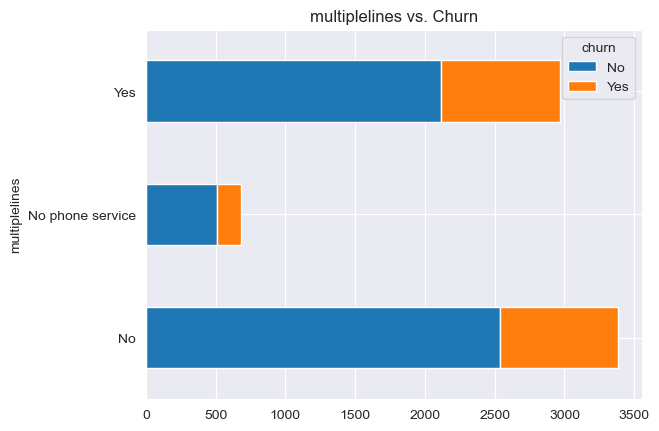

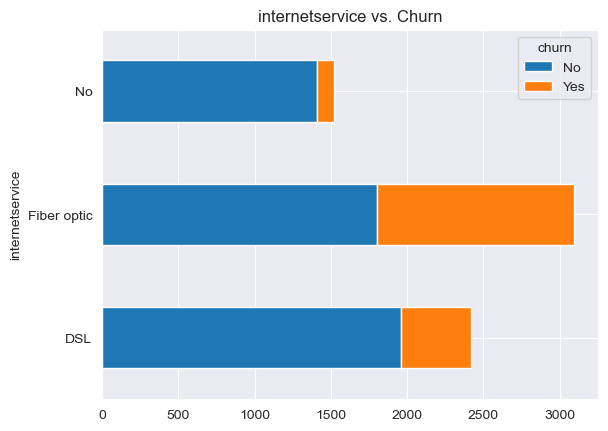

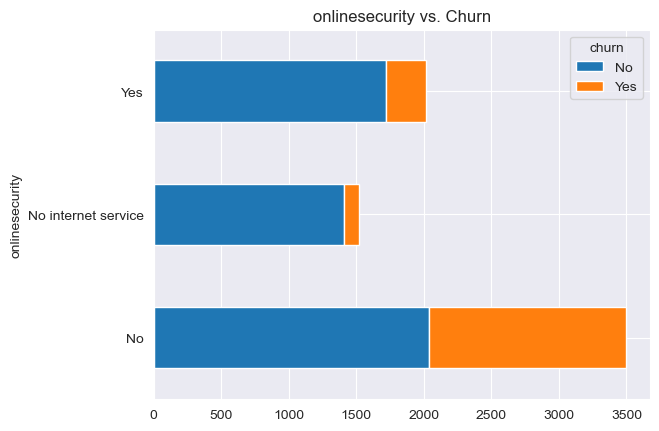

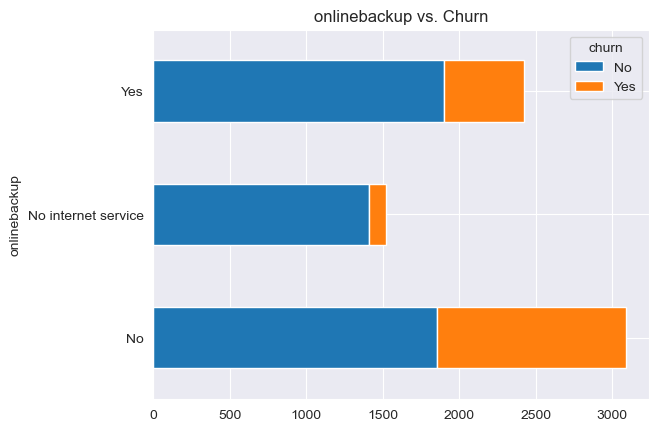

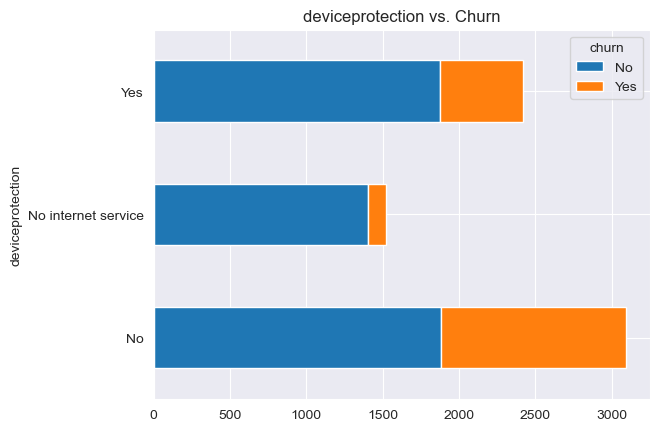

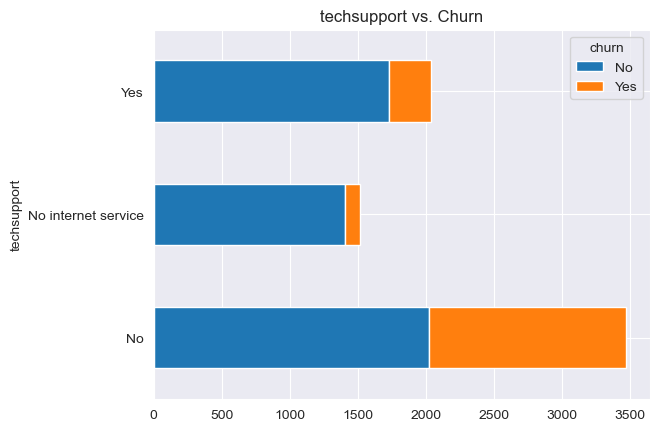

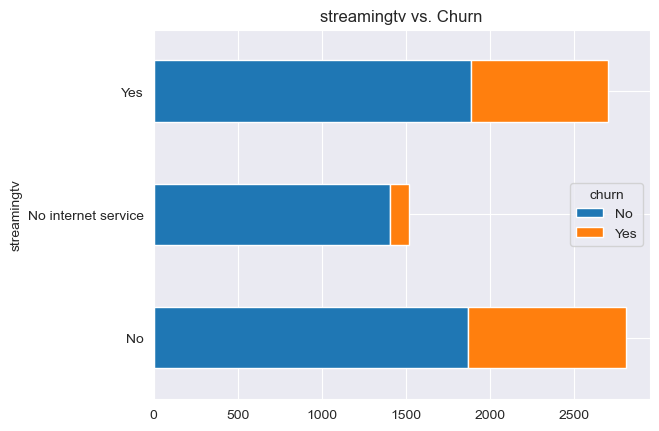

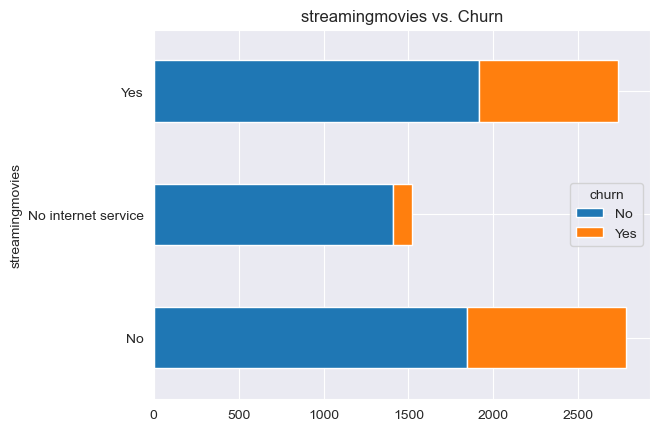

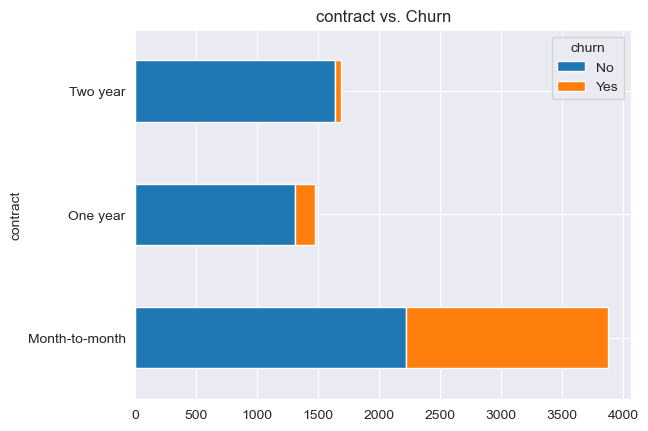

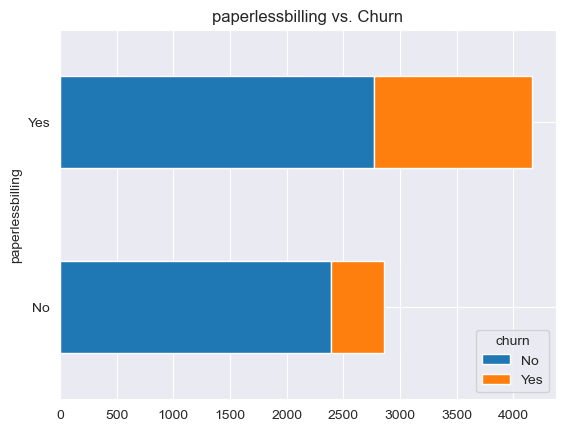

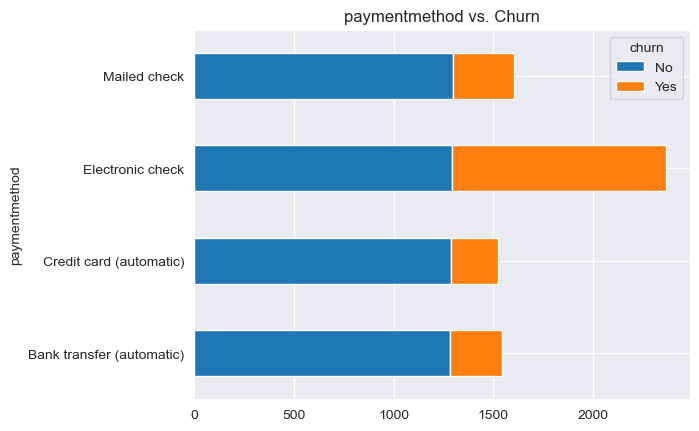

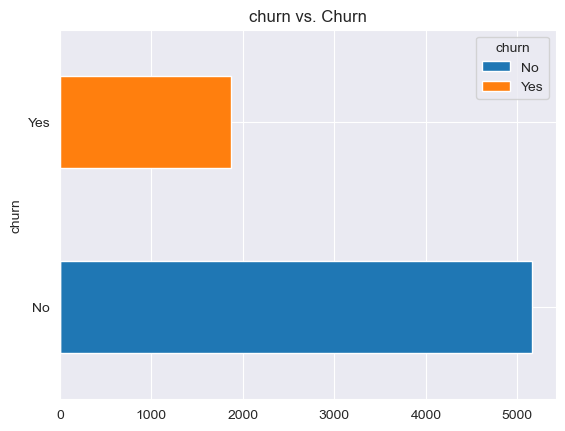

In [36]:
for col in object_cols:
    cross_df = pd.crosstab(df[col],df['churn'])
    cross_df.plot(kind='barh',stacked=True)
    plt.title(f'{col} vs. Churn')

### Taking Churn as target variable plotting graphs with other columns for bivariate analysis

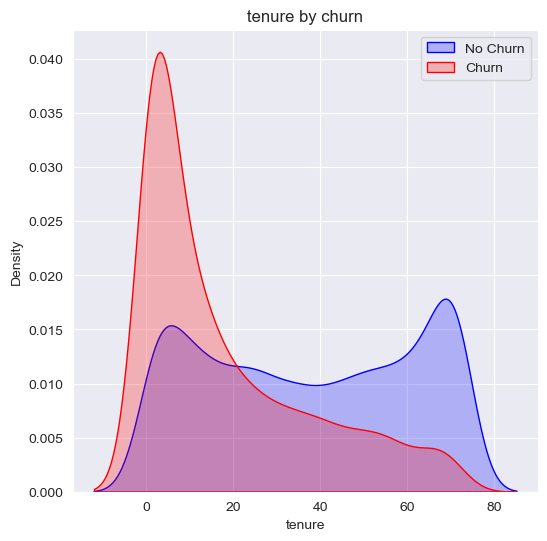

In [37]:
fig, axs = plt.subplots(figsize=(6,6)) 
axs = sns.kdeplot(df.loc[df["churn"] == 'No', "tenure"] ,
                color="blue", fill = True)
axs = sns.kdeplot(df.loc[df["churn"] == 'Yes', "tenure"],
                ax =axs, color="red", fill= True)
sns.set_style("darkgrid")
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('tenure')
axs.set_title('tenure by churn')
plt.show()

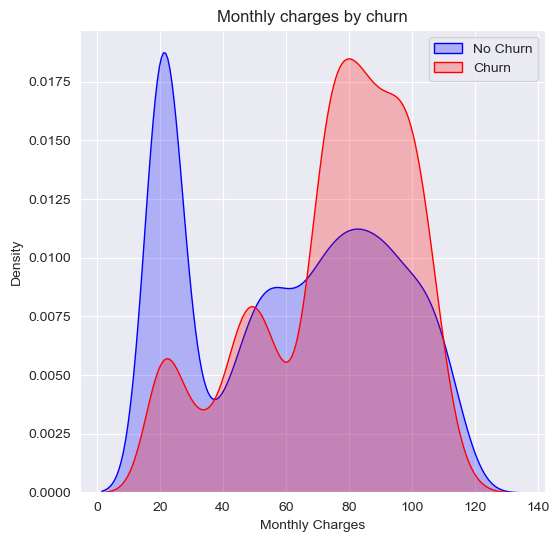

In [38]:
fig, axs = plt.subplots(figsize=(6,6)) 
axs = sns.kdeplot(df.loc[df["churn"] == 'No', "monthlycharges"],
                color="blue", fill = True)
axs = sns.kdeplot(df.loc[df["churn"] == 'Yes', "monthlycharges"],
                ax =axs, color="red", fill= True)
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('Monthly Charges')
axs.set_title('Monthly charges by churn')
plt.show()

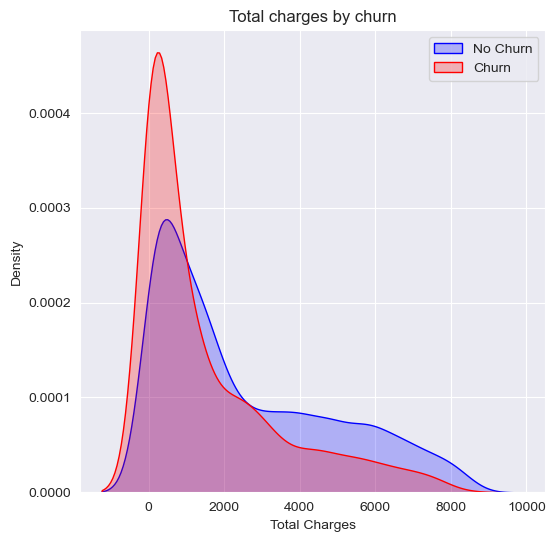

In [39]:
fig, axs = plt.subplots(figsize=(6,6))
axs = sns.kdeplot(df.loc[df["churn"] == 'No', "totalcharges"],
                color="blue", fill = True,ax=axs)
axs = sns.kdeplot(df.loc[df["churn"] == 'Yes', "totalcharges"],
                ax =axs, color="red", fill= True)
axs.legend(["No Churn","Churn"],loc='upper right')
axs.set_ylabel('Density')
axs.set_xlabel('Total Charges')
axs.set_title('Total charges by churn')
plt.show()

**INSIGHTS**

**The High Churn for**
- the customer who opted for “phone service”  and internet service as  “fiber optics”.
- the customer who have “no online security”, “no online backup”, ”no device protection” and “no tech support”.
- the customers who have less “contract period” and payment method as “electronic check”.
- customers with Lower tenure,lower total charges, and higher monthly charges

**Recommendations**
- combining phone and fiber optic internet services, can often result in cost savings compared to having separate plans.
- offering packages or add-ons that improve online security, provide device protection, and include technical support can enhance the overall servicing offering. 
- consider offering flexible contract plans, exceptional customer support, competitive pricing and promotions .
- provide Real-Time Payment Confirmation,faster check clearing and e-check verification services for electronic check payments.